## Exercise: Build a logistic regression model to predict fish species
* Adapted from: https://github.com/Tebs-Lab/data-science-three-day-workshop/blob/main/02-linear-logistic-regression/04-logistic-regression-exercise.ipynb

* Using the dataset __`data/Fish.csv`__ do the following

  1. Split data into features and labels (targets) with the __`species`__ column as the label and the other columns as features
  2. Split the data into training and validation sets
  3. Fit the model!
  4. Score the model. What is this value? How should you interpret it?
  5. Examine the coefficents and intercept value...
    * These are a strange shape compared to linear regression 
    * Can you explain what they are?
  6. Compute and plot a _confusion matrix_
    * A confusion matrix is a summary of prediction results on a classification problem
    * Is your model good at some classes and bad at others?
    * Are there any interesting trends in the confusion matrix?

In [112]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [113]:
# Load the data
fish_dataset = pd.read_csv('data/Fish.csv')
fish_dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [114]:
# 1. split data into labels and features
labels = fish_dataset['Species']
features = fish_dataset.drop(['Species'], axis=1)

In [115]:
training_data, test_data, training_labels, test_labels = \
        train_test_split(features, labels, test_size=0.2, random_state=112)

In [116]:
# 3. fit the model
model = LogisticRegression()
model.fit(training_data, training_labels)

# 4. score the model
print(model.score(test_data, test_labels))

0.625


/Users/dave-wadestein/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### What about that error?

* During the training process the model did not converge to a stable state
* During training the coefs are each adjusted by a small amount (the exact amount depends on the solver used, and how bad the predictions were during this round of training)
* Eventually, as the model trains we expect the adjustments to get smaller and smaller as the model "converges" to a state where its predictions are no longer improving due to the new adjustments.

* Let's give our model some more iterations to converge...

In [119]:
# 3. fit the model
model = LogisticRegression(max_iter=20_000)
model.fit(training_data, training_labels)

LogisticRegression(max_iter=20000)

In [120]:
# 4. score the model
print(model.score(test_data, test_labels))

0.875


## Note

* An __`ovr`__ ("One Versus the Rest") regression will generally converge much faster...let's see if that holds up in this case

In [121]:
# 3. fit the model
model = LogisticRegression(max_iter=500, multi_class='ovr')
model.fit(training_data, training_labels)

LogisticRegression(max_iter=500, multi_class='ovr')

In [122]:
# 4. score the model
print(model.score(test_data, test_labels))

0.875


**Faster to train, and identical accuracy in this case!**

* That won't ALWAYS be true, sometimes the default __`multinomial`__ will outperform __`ovr`__ but it's worth trying __`ovr`__ first because if it's good enough you might not need to spend the extra time training a __`multinomial`__

### What was that score value?

* The __`.score()`__ function yields "accuracy", i.e., the percentage of time our model correctly predicts the species of fish

In [24]:
print(model.coef_, '\n\n', model.intercept_)

[[-1.21907943e-02 -4.16609370e-01 -2.63220839e-01  8.22562081e-01
   1.59503834e+00 -1.26440838e-01]
 [-2.62137229e-02 -2.06440487e-02 -1.32556533e-01 -5.01133791e-01
   2.07879014e+00 -8.82756640e-02]
 [-3.01476313e-03  3.97826115e-01  2.44731002e+00 -2.88113121e+00
   1.48207830e-01  1.90982021e+00]
 [-2.55466783e-02  4.25541386e-01  4.59213909e-01  5.25986062e-01
  -5.39465677e-01 -1.74508185e-01]
 [-2.11633310e-02  5.85844361e-02 -1.51025876e+00  1.44227535e+00
  -3.49544138e-01  2.01983779e+00]
 [-8.19201345e-02  4.25444227e-01 -5.46126973e-03  8.22216490e-02
  -1.53145262e+00 -7.39968655e-01]
 [ 1.67949335e-03 -4.75024959e-01 -4.85715260e-02  3.63223671e-01
  -2.74465267e-01  1.03913983e+00]] 

 [-21.13194703   0.19167867  -0.43199772 -34.08286519  -5.61106896
   1.65634396  -3.76674339]


## What is that?

* __`coef_`__ consists of 7 arrays each of length 6
  * i.e., one array of coefficents for each of the sigmoid functions that was fitted
  * ...and one coefficient per input feature in each of those arrays 

* the intercept also has 7 values: one for each of the species, i.e., one for each of the fitted sigmoid functions

## Confusion Matrix
* a helpful visual tool to identify how our model is performing with respect to each individual class
* __`len(labels) x len(labels)`__ matrix
* columns indicate our model's prediction and rows indicate the actual labels

In [125]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_data)
cm = confusion_matrix(test_labels, predictions)
print(cm)

[[8 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 9 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 1 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 3 0 0 0 0]]


## We can display the confusion matrix as an image...

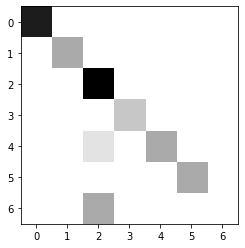

In [127]:
plt.imshow(cm, cmap='binary');

## We can make a prettier image using a library called seaborn

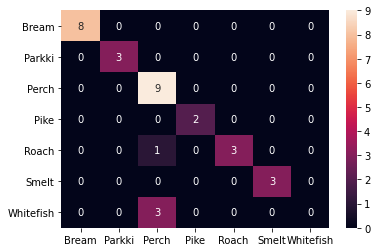

In [128]:
import seaborn as sns

name_labels = model.classes_

sns.heatmap(cm, annot=True, xticklabels=name_labels, yticklabels=name_labels)
plt.show()

## Notes

* This visualization makes it clear that our test data is very small
* We're usually right, but we've got 2 forms of error
    * 3 Whitefish classified as Perch
    * 1 Roach being classified as a Perch
    
* Just for fun, lets see this chart with the training data...

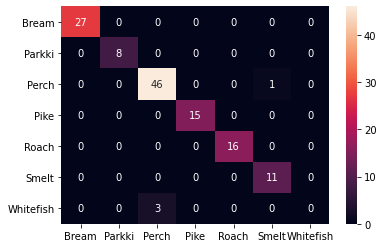

In [130]:
predictions = model.predict(training_data)
cm = confusion_matrix(training_labels, predictions)
sn.heatmap(cm, annot=True, xticklabels=name_labels, yticklabels=name_labels)
plt.show()

**This dataset is way too small, but we can see that Whitefish are apparently a challenge, possibly because we have so few samples of that class compared to the others**

* This problem, called _class imbalance_ is something to be aware of
* ML models work best when each class is more-or-less equally represented in the training data
* Note that wasn't a problem for Parkki in this case...